In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Transformer

In [27]:
plt.rcParams["font.size"] = 18

In [3]:
projTransformer = Transformer.from_crs("epsg:31468", "epsg:4326")

In [4]:
carless_data = pd.read_csv("matsim-berlin-run-carless-ring-3_20220701-181409.csv")
normal_data = pd.read_csv("matsim-berlin-run-2_20220701-184547.csv")
online_data = pd.read_csv("berlin-v5.5.3-1pct_20220703-165847.csv")

/tmp/ipykernel_10223/684137727.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  carless_data = pd.read_csv("matsim-berlin-run-carless-ring-3_20220701-181409.csv")
/tmp/ipykernel_10223/684137727.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  normal_data = pd.read_csv("matsim-berlin-run-2_20220701-184547.csv")
/tmp/ipykernel_10223/684137727.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  online_data = pd.read_csv("berlin-v5.5.3-1pct_20220703-165847.csv")


In [5]:
carless_data["primaryLegModeByDistance"] = carless_data[
    ["travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
     "travelDistanceBike"]].idxmax(axis=1)

carless_data["primaryLegModeByDistance"] = carless_data["primaryLegModeByDistance"].apply(
    lambda row: row.replace("travelDistance", "").lower())

carless_data

personId  isAffected primaryLegMode        coordX  \
0                     100012001       False           walk  4.628514e+06   
1                      10001401       False            car  4.602137e+06   
2                     100041201       False        bicycle  4.627570e+06   
3                     100048001       False           ride  4.625550e+06   
4                     100117301       False            car  4.627250e+06   
...                         ...         ...            ...           ...   
49300  freight_952_13245-berlin       False        freight  4.574263e+06   
49301  freight_965_13245-berlin       False        freight  4.574263e+06   
49302  freight_994_13245-berlin       False        freight  4.574263e+06   
49303  freight_996_87464-berlin       False        freight  4.603503e+06   
49304   freight_9_144245-berlin       False        freight  4.574147e+06   

             coordY  travelTimeWalk  travelTimeCar  travelTimeRide  \
0      5.831327e+06          5144.0            0.0          1047.0   
1      5.706357e+06          8800.0         9037.0             0.0   
2      5.828417e+06             0.0            0.0             0.0   
3      5.824198e+06          1440.0            0.0          1554.0   
4      5.827690e+06          3586.0        12150.0             0.0   
...             ...             ...            ...             ...   
49300  5.822580e+06            49.0            0.0             0.0   
49301  5.822580e+06            41.0            0.0             0.0   
49302  5.822580e+06            71.0            0.0             0.0   
49303  5.808240e+06            29.0            0.0             0.0   
49304  5.809461e+06            28.0            0.0             0.0   

       travelTimePt  travelTimeBike  travelTimeFreight  travelDistanceWalk  \
0               0.0             0.0                0.0         5431.830593   
1               0.0             0.0                0.0         9298.707408   
2               0.0          3134.0                0.0            0.000000   
3               0.0             0.0                0.0         1521.787790   
4               0.0             0.0                0.0         3793.147334   
...             ...             ...                ...                 ...   
49300           0.0             0.0             5302.0           52.342074   
49301           0.0             0.0             4017.0           44.240611   
49302           0.0             0.0             3465.0           75.045153   
49303           0.0             0.0             2818.0           30.984966   
49304           0.0             0.0             4058.0           29.882341   

       travelDistanceCar  travelDistanceRide  travelDistancePt  \
0               0.000000        19708.765187               0.0   
1          115174.683489            0.000000               0.0   
2               0.000000            0.000000               0.0   
3               0.000000        21164.108496               0.0   
4          185468.676299            0.000000               0.0   
...                  ...                 ...               ...   
49300           0.000000            0.000000               0.0   
49301           0.000000            0.000000               0.0   
49302           0.000000            0.000000               0.0   
49303           0.000000            0.000000               0.0   
49304           0.000000            0.000000               0.0   

       travelDistanceBike  travelDistanceFreight primaryLegModeByDistance  
0                 0.00000               0.000000                     ride  
1                 0.00000               0.000000                      car  
2              9842.44395               0.000000                     bike  
3                 0.00000               0.000000                     ride  
4                 0.00000               0.000000                      car  
...                   ...                    ...                      ...  
49300  

In [6]:
normal_data["primaryLegModeByDistance"] = normal_data[
    ["travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
     "travelDistanceBike"]].idxmax(axis=1)

normal_data["primaryLegModeByDistance"] = normal_data["primaryLegModeByDistance"].apply(
    lambda row: row.replace("travelDistance", "").lower())

normal_data

personId  isAffected primaryLegMode        coordX  \
0                     100012001       False           walk  4.628514e+06   
1                      10001401       False            car  4.602137e+06   
2                     100041201       False        bicycle  4.627570e+06   
3                     100048001       False           ride  4.625550e+06   
4                     100117301       False            car  4.627250e+06   
...                         ...         ...            ...           ...   
49300  freight_952_13245-berlin       False        freight  4.574263e+06   
49301  freight_965_13245-berlin       False        freight  4.574263e+06   
49302  freight_994_13245-berlin       False        freight  4.574263e+06   
49303  freight_996_87464-berlin       False        freight  4.603503e+06   
49304   freight_9_144245-berlin       False        freight  4.574147e+06   

             coordY  travelTimeWalk  travelTimeCar  travelTimeRide  \
0      5.831327e+06          5144.0            0.0          1047.0   
1      5.706357e+06          8800.0         9037.0             0.0   
2      5.828417e+06             0.0            0.0             0.0   
3      5.824198e+06          1440.0            0.0          1554.0   
4      5.827690e+06          3586.0        12591.0             0.0   
...             ...             ...            ...             ...   
49300  5.822580e+06            49.0            0.0             0.0   
49301  5.822580e+06            41.0            0.0             0.0   
49302  5.822580e+06            71.0            0.0             0.0   
49303  5.808240e+06            29.0            0.0             0.0   
49304  5.809461e+06            28.0            0.0             0.0   

       travelTimePt  travelTimeBike  travelTimeFreight  travelDistanceWalk  \
0               0.0             0.0                0.0         5431.830593   
1               0.0             0.0                0.0         9298.707408   
2               0.0          3134.0                0.0            0.000000   
3               0.0             0.0                0.0         1521.787790   
4               0.0             0.0                0.0         3793.147334   
...             ...             ...                ...                 ...   
49300           0.0             0.0             5511.0           52.342074   
49301           0.0             0.0             4072.0           44.240611   
49302           0.0             0.0             3390.0           75.045153   
49303           0.0             0.0             2738.0           30.984966   
49304           0.0             0.0             4476.0           29.882341   

       travelDistanceCar  travelDistanceRide  travelDistancePt  \
0               0.000000        19708.765187               0.0   
1          115174.683489            0.000000               0.0   
2               0.000000            0.000000               0.0   
3               0.000000        21164.108496               0.0   
4          184249.656582            0.000000               0.0   
...                  ...                 ...               ...   
49300           0.000000            0.000000               0.0   
49301           0.000000            0.000000               0.0   
49302           0.000000            0.000000               0.0   
49303           0.000000            0.000000               0.0   
49304           0.000000            0.000000               0.0   

       travelDistanceBike  travelDistanceFreight primaryLegModeByDistance  
0                 0.00000               0.000000                     ride  
1                 0.00000               0.000000                      car  
2              9842.44395               0.000000                     bike  
3                 0.00000               0.000000                     ride  
4                 0.00000               0.000000                      car  
...                   ...                    ...                      ...  
49300  

In [7]:
online_data

personId  isAffected primaryLegMode        coordX  \
0                     100012001       False           walk  4.628514e+06   
1                      10001401       False            car  4.602137e+06   
2                     100041201       False        bicycle  4.627570e+06   
3                     100048001       False           ride  4.625550e+06   
4                     100117301       False            car  4.627250e+06   
...                         ...         ...            ...           ...   
49300  freight_952_13245-berlin       False        freight  4.574263e+06   
49301  freight_965_13245-berlin       False        freight  4.574263e+06   
49302  freight_994_13245-berlin       False        freight  4.574263e+06   
49303  freight_996_87464-berlin       False        freight  4.603503e+06   
49304   freight_9_144245-berlin       False        freight  4.574147e+06   

             coordY  travelTimeWalk  travelTimeCar  travelTimeRide  \
0      5.831327e+06          5144.0            0.0          1048.0   
1      5.706357e+06          8800.0        10140.0             0.0   
2      5.828417e+06             0.0            0.0             0.0   
3      5.824198e+06          1440.0            0.0          1557.0   
4      5.827690e+06          3586.0        12150.0             0.0   
...             ...             ...            ...             ...   
49300  5.822580e+06            49.0            0.0             0.0   
49301  5.822580e+06            41.0            0.0             0.0   
49302  5.822580e+06            71.0            0.0             0.0   
49303  5.808240e+06            29.0            0.0             0.0   
49304  5.809461e+06            28.0            0.0             0.0   

       travelTimePt  travelTimeBike  travelTimeFreight  travelDistanceWalk  \
0               0.0             0.0                0.0         5431.830593   
1               0.0             0.0                0.0         9298.707408   
2               0.0          3134.0                0.0            0.000000   
3               0.0             0.0                0.0         1521.787790   
4               0.0             0.0                0.0         3793.147334   
...             ...             ...                ...                 ...   
49300           0.0             0.0             5636.0           52.342074   
49301           0.0             0.0             4015.0           44.240611   
49302           0.0             0.0             3348.0           75.045153   
49303           0.0             0.0             3920.0           30.984966   
49304           0.0             0.0             4387.0           29.882341   

       travelDistanceCar  travelDistanceRide  travelDistancePt  \
0               0.000000        19708.765187               0.0   
1          111099.015555            0.000000               0.0   
2               0.000000            0.000000               0.0   
3               0.000000        21164.108496               0.0   
4          185468.676299            0.000000               0.0   
...                  ...                 ...               ...   
49300           0.000000            0.000000               0.0   
49301           0.000000            0.000000               0.0   
49302           0.000000            0.000000               0.0   
49303           0.000000            0.000000               0.0   
49304           0.000000            0.000000               0.0   

       travelDistanceBike  travelDistanceFreight  
0                 0.00000               0.000000  
1                 0.00000               0.000000  
2              9842.44395               0.000000  
3                 0.00000               0.000000  
4                 0.00000               0.000000  
...                   ...                    ...  
49300             0.00000           39917.664894  
49301             0.00000           26849.308114  
49302             0.00000           24011.041982  
49303             0.00000    

In [8]:
normal_data[["travelTimeWalk", "travelTimeCar", "travelTimeRide", "travelTimePt",
             "travelTimeBike"]].sum()

travelTimeWalk    97204411.0
travelTimeCar     68042167.0
travelTimeRide    25172316.0
travelTimePt      54563135.0
travelTimeBike    53443617.0
dtype: float64

In [9]:
online_data[["travelTimeWalk", "travelTimeCar", "travelTimeRide", "travelTimePt",
             "travelTimeBike"]].sum()

travelTimeWalk    97157133.0
travelTimeCar     68086577.0
travelTimeRide    25175739.0
travelTimePt      54419807.0
travelTimeBike    53428006.0
dtype: float64

In [10]:
num_affected = carless_data[normal_data["isAffected"]].shape[0]
total_persons = carless_data.shape[0]
print(
    f"A total of {num_affected} out of {total_persons} persons ({num_affected / total_persons * 100.0}%) was affected by making the area inside the S-Bahn-Ring a no-car-zone.")

A total of 14702 out of 49305 persons (29.81847682790792%) was affected by making the area inside the S-Bahn-Ring a no-car-zone.


/tmp/ipykernel_10223/2099601317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data_travel_distance["travelDistanceOverall"] = normal_data_travel_distance.sum(axis=1)
/tmp/ipykernel_10223/2099601317.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data_travel_distance["travelDistanceOverall"] = online_data_travel_distance.sum(axis=1)


<AxesSubplot:ylabel='travel distance in meters'>

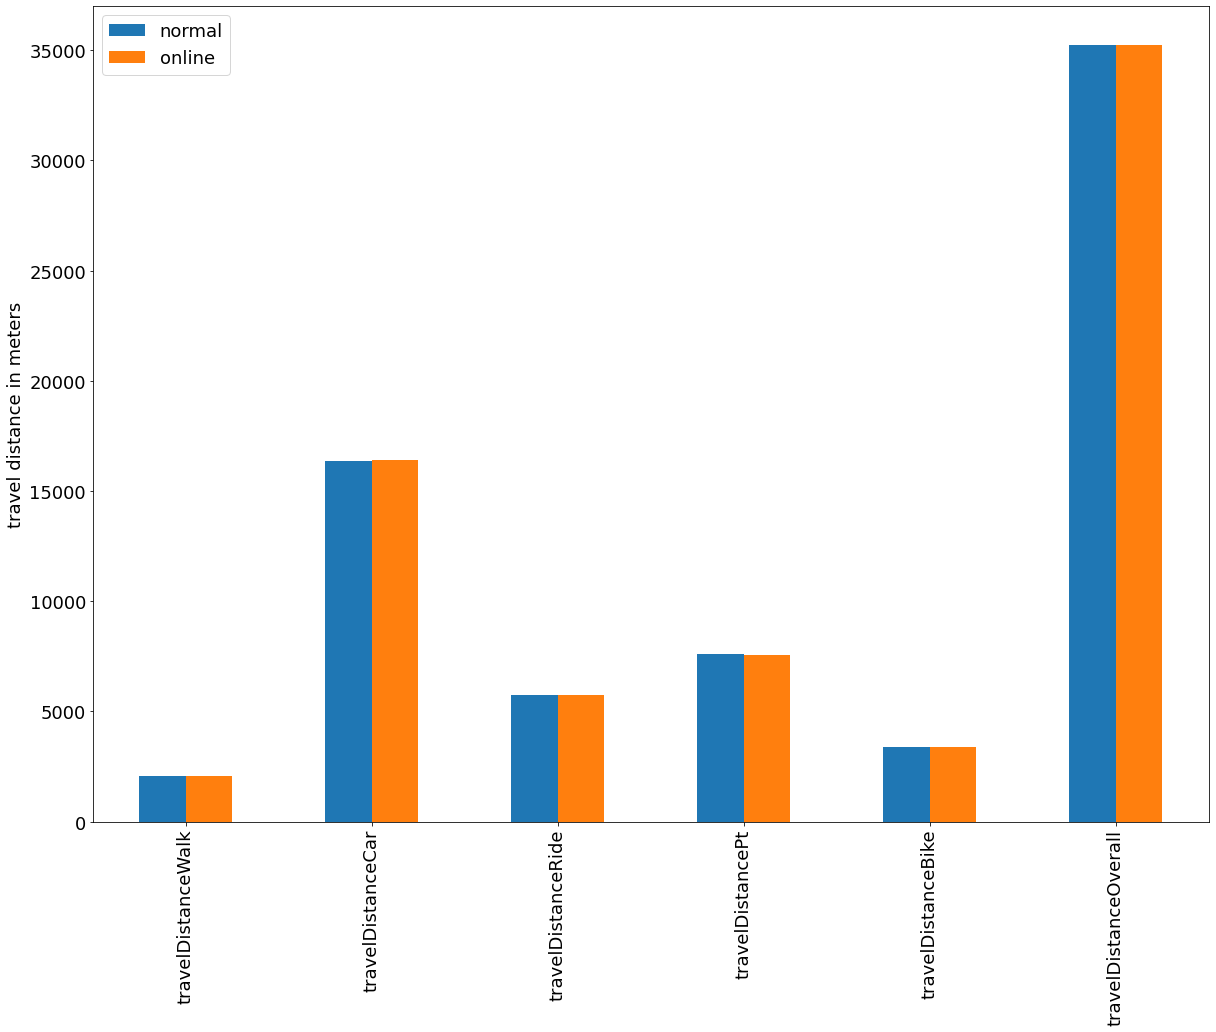

In [28]:
normal_data_travel_distance = normal_data[[
    "travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
    "travelDistanceBike"]]
normal_data_travel_distance["travelDistanceOverall"] = normal_data_travel_distance.sum(axis=1)
online_data_travel_distance = online_data[
    ["travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
     "travelDistanceBike"]]
online_data_travel_distance["travelDistanceOverall"] = online_data_travel_distance.sum(axis=1)
meter_travelled_normal_online_combined_for_plot = pd.DataFrame(
    {"normal": normal_data_travel_distance.mean(), "online": online_data_travel_distance.mean()})
meter_travelled_normal_online_combined_for_plot.plot.bar(ylabel="travel distance in meters", figsize=(20, 15))

In [12]:
# meter_travelled_normal_online_combined_for_boxplot = pd.DataFrame(
#     {"normal": normal_data_travel_distance, "online": online_data_travel_distance})
# meter_travelled_normal_online_combined_for_boxplot

In [13]:
meter_travelled_normal_per_person_affected_per_legmode = normal_data[normal_data["isAffected"]][[
    "travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
    "travelDistanceBike"]]
meter_travelled_normal_per_person_affected_per_legmode[
    "travelDistanceOverall"] = meter_travelled_normal_per_person_affected_per_legmode.sum(axis=1)
meter_travelled_normal_mean = meter_travelled_normal_per_person_affected_per_legmode.mean()
meter_travelled_normal_mean

travelDistanceWalk        2596.568398
travelDistanceCar         8910.818444
travelDistanceRide        3910.451308
travelDistancePt         19672.053579
travelDistanceBike        1614.124744
travelDistanceOverall    36704.016474
dtype: float64

In [14]:
meter_travelled_carless_per_person_affected_per_legmode = carless_data[normal_data["isAffected"]][[
    "travelDistanceWalk", "travelDistanceCar", "travelDistanceRide", "travelDistancePt",
    "travelDistanceBike"]]
meter_travelled_carless_per_person_affected_per_legmode[
    "travelDistanceOverall"] = meter_travelled_carless_per_person_affected_per_legmode.sum(axis=1)
meter_travelled_carless_mean = meter_travelled_carless_per_person_affected_per_legmode.mean()
meter_travelled_carless_mean

travelDistanceWalk        3294.612898
travelDistanceCar         1254.617362
travelDistanceRide        3892.911280
travelDistancePt         23948.969298
travelDistanceBike        4286.154537
travelDistanceOverall    36677.265375
dtype: float64

<AxesSubplot:ylabel='travel distance in meters'>

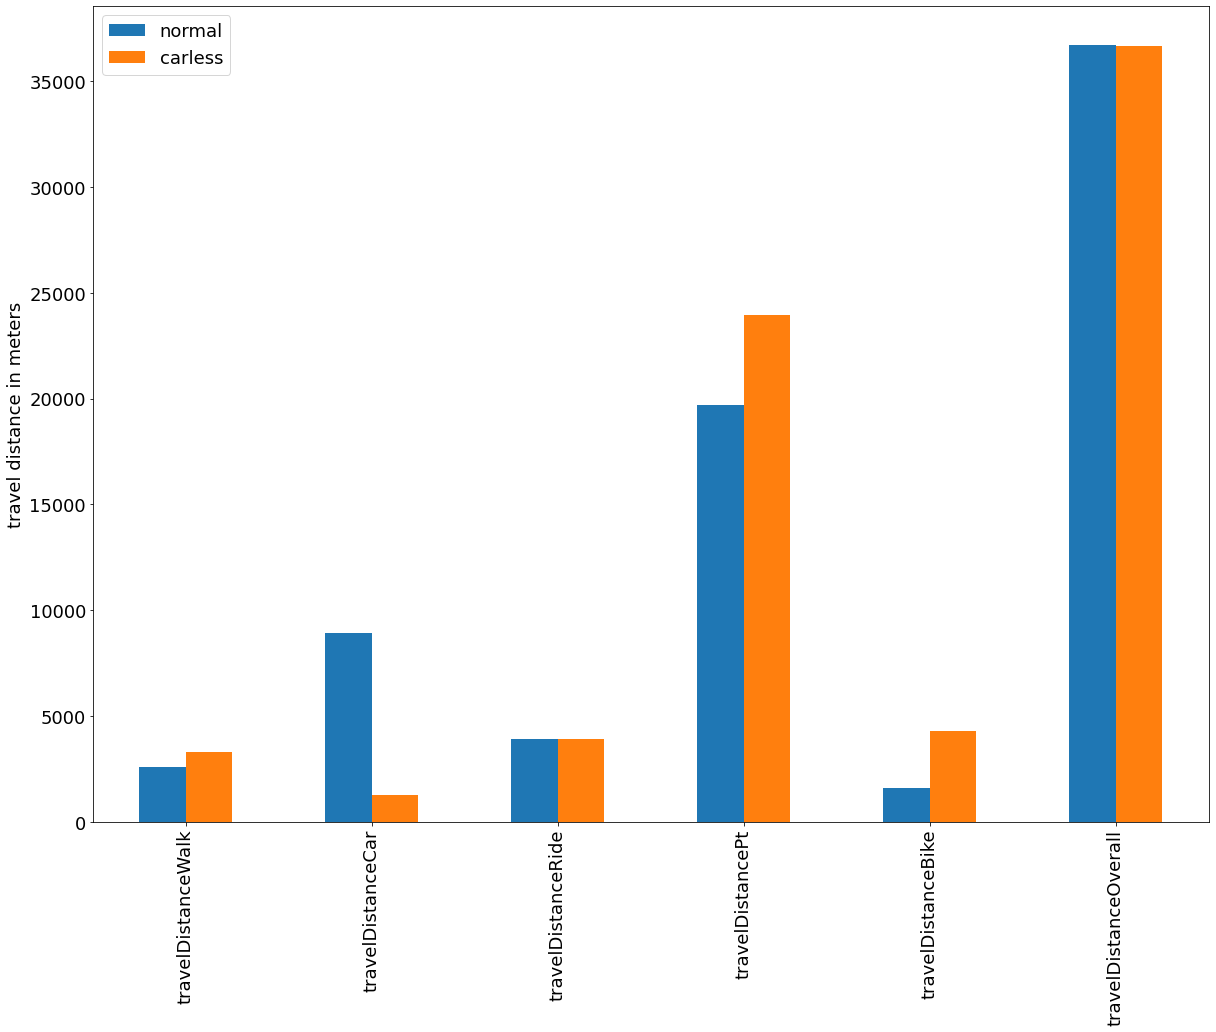

In [29]:
meter_travelled_combined_for_plot = pd.DataFrame(
    {"normal": meter_travelled_normal_mean, "carless": meter_travelled_carless_mean})
meter_travelled_combined_for_plot.plot.bar(ylabel="travel distance in meters", figsize=(20, 15))


In [16]:
time_spent_normal_per_person_affected_per_legmode = normal_data[normal_data["isAffected"]][[
    "travelTimeWalk", "travelTimeCar", "travelTimeRide", "travelTimePt",
    "travelTimeBike"]]
time_spent_normal_per_person_affected_per_legmode[
    "travelTimeOverall"] = time_spent_normal_per_person_affected_per_legmode.sum(axis=1)
time_spent_normal_mean = time_spent_normal_per_person_affected_per_legmode.mean()
time_spent_normal_mean

travelTimeWalk       2458.858047
travelTimeCar        1027.582234
travelTimeRide        442.402598
travelTimePt         2776.253435
travelTimeBike        514.040267
travelTimeOverall    7219.136580
dtype: float64

In [17]:
time_spent_carless_per_person_affected_per_legmode = carless_data[normal_data["isAffected"]][[
    "travelTimeWalk", "travelTimeCar", "travelTimeRide", "travelTimePt",
    "travelTimeBike"]]
time_spent_carless_per_person_affected_per_legmode[
    "travelTimeOverall"] = time_spent_carless_per_person_affected_per_legmode.sum(axis=1)
time_spent_carless_mean = time_spent_carless_per_person_affected_per_legmode.mean()
time_spent_carless_mean


travelTimeWalk       3121.006190
travelTimeCar         149.040675
travelTimeRide        429.723779
travelTimePt         3477.713780
travelTimeBike       1365.162427
travelTimeOverall    8542.646851
dtype: float64

<AxesSubplot:ylabel='travel time in seconds'>

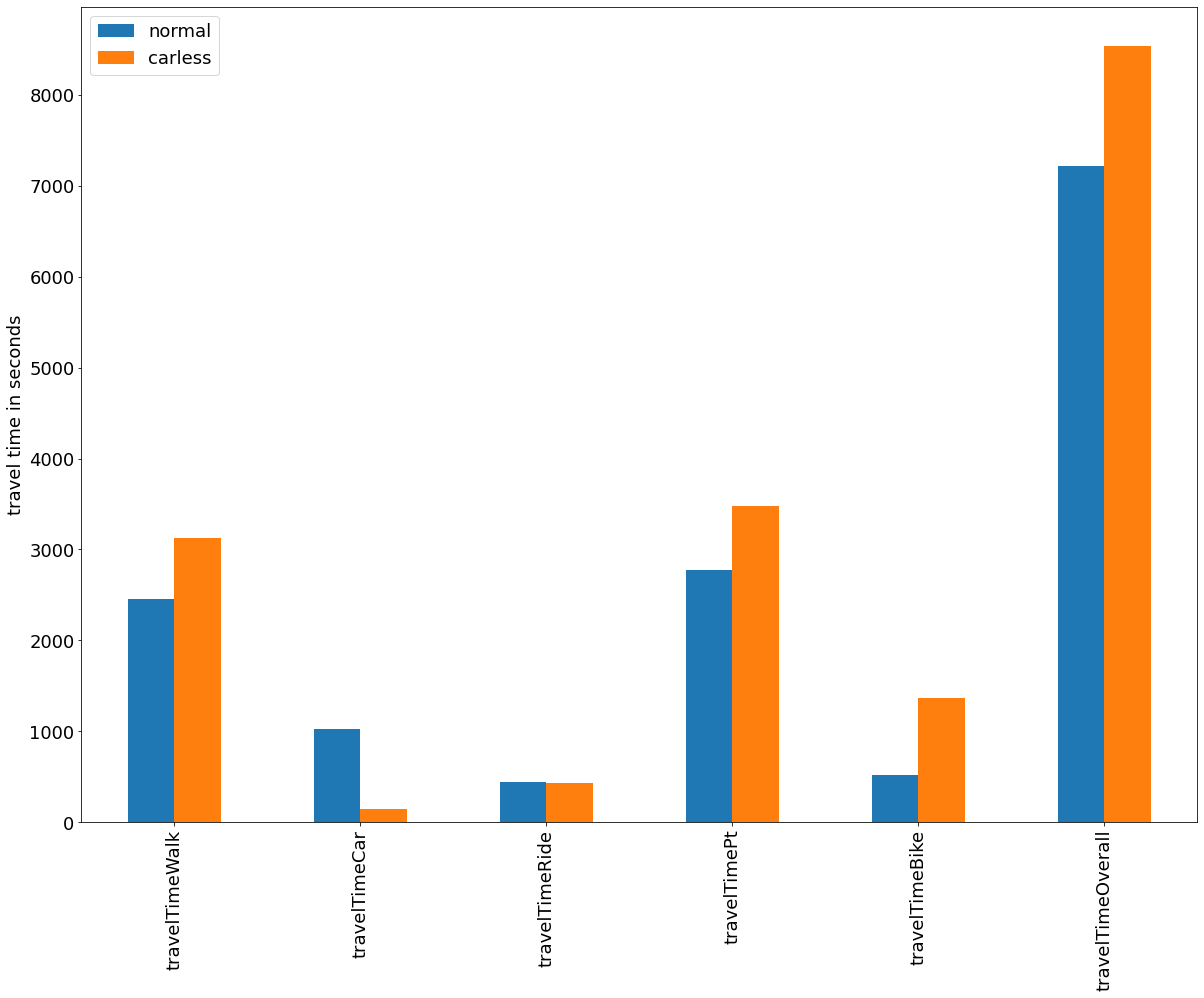

In [30]:
time_spent_combined_for_plot = pd.DataFrame(
    {"normal": time_spent_normal_mean, "carless": time_spent_carless_mean})
time_spent_combined_for_plot.plot.bar(ylabel="travel time in seconds", figsize=(20, 15))


In [19]:
coordinates_per_person_affected = carless_data[normal_data["isAffected"]][["coordX", "coordY"]]


def convertCoords(row):
    # x2, y2 = pyproj.transform(inProj, outProj, row['coordX'], row['coordY'])
    x2, y2 = projTransformer.transform(row["coordY"], row["coordX"])
    return pd.Series({'longitude': x2, 'latitude': y2})


coordinates_per_person_affected[["longitude", "latitude"]] = coordinates_per_person_affected.apply(convertCoords,
                                                                                                   axis=1)
coordinates_per_person_affected

coordX        coordY  longitude   latitude
14     4.628064e+06  5.829955e+06  52.587530  13.888092
32     4.628672e+06  5.828751e+06  52.576578  13.896589
33     4.628323e+06  5.829490e+06  52.583300  13.891736
40     4.627856e+06  5.828689e+06  52.576213  13.884541
63     4.627514e+06  5.828350e+06  52.573249  13.879361
...             ...           ...        ...        ...
49257  4.596681e+06  5.834977e+06  52.639125  13.426677
49276  4.583584e+06  5.838455e+06  52.672549  13.234128
49284  4.583584e+06  5.838455e+06  52.672549  13.234128
49285  4.581024e+06  5.808486e+06  52.403677  13.188996
49297  4.574263e+06  5.822580e+06  52.531275  13.092810

[14702 rows x 4 columns]

In [20]:
BBox = (coordinates_per_person_affected.longitude.min(), coordinates_per_person_affected.longitude.max(),
        coordinates_per_person_affected.latitude.min(), coordinates_per_person_affected.latitude.max())
BBox


(51.519685547550154, 53.31263497055429, 11.74379988621806, 14.702480247230389)

In [21]:
berlin_png = plt.imread("berlin.png")
berlin_png.shape


(860, 866, 4)

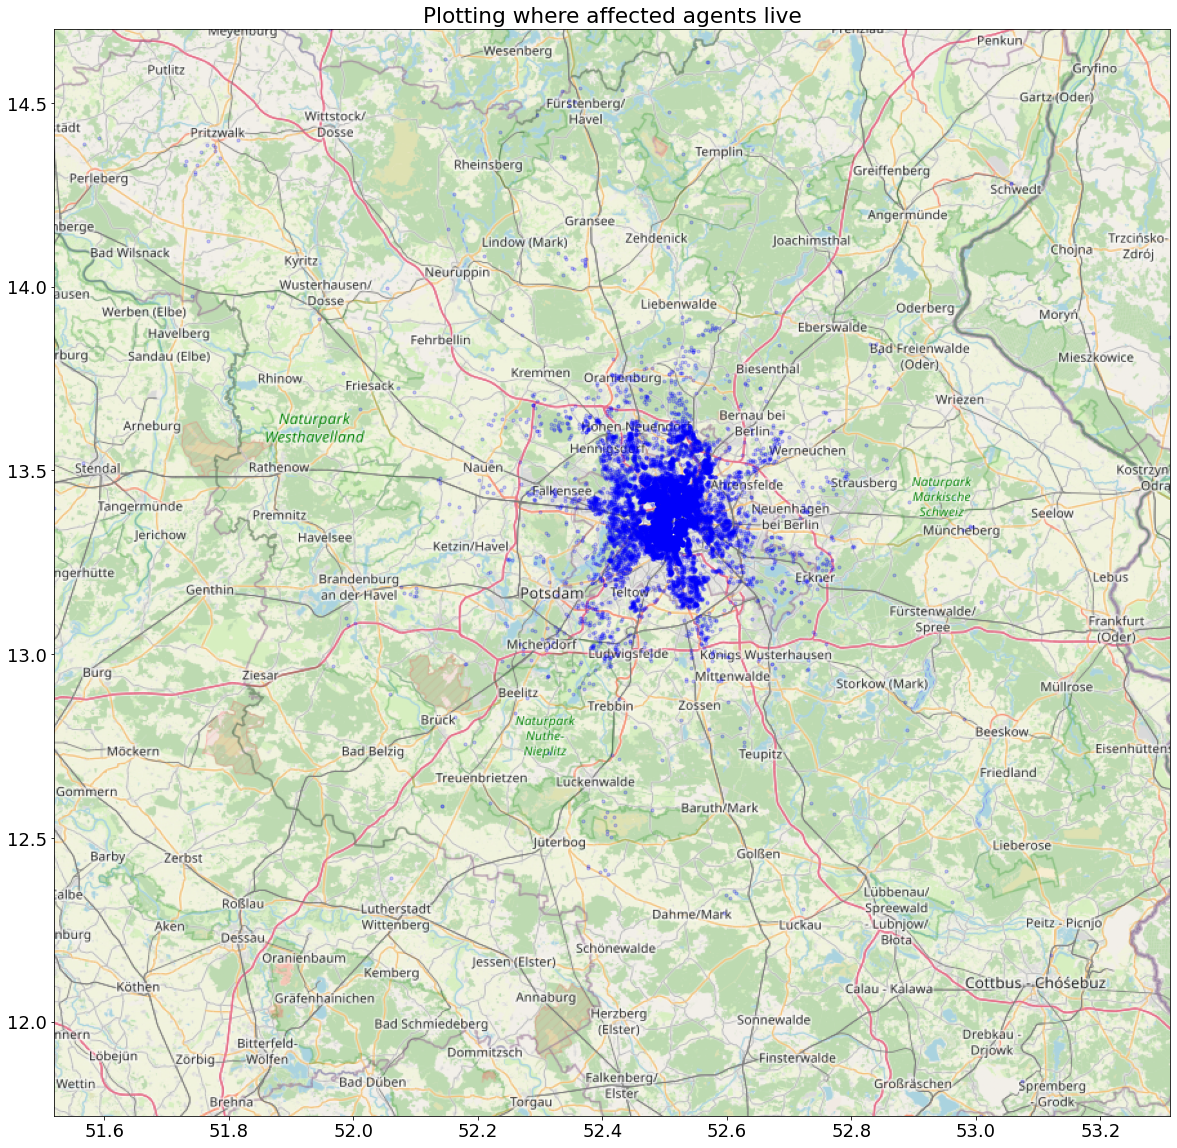

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(coordinates_per_person_affected.longitude, coordinates_per_person_affected.latitude, zorder=1, alpha=0.2,
           c='b', s=10)
ax.set_title('Plotting where affected agents live')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(berlin_png, zorder=0, extent=BBox, aspect='auto')


In [23]:
coordinates_per_person_unaffected = carless_data[normal_data["isAffected"] == False][["coordX", "coordY"]]


def convertCoords(row):
    # x2, y2 = pyproj.transform(inProj, outProj, row['coordX'], row['coordY'])
    x2, y2 = projTransformer.transform(row["coordY"], row["coordX"])
    return pd.Series({'longitude': x2, 'latitude': y2})


coordinates_per_person_unaffected[["longitude", "latitude"]] = coordinates_per_person_unaffected.apply(convertCoords,
                                                                                                       axis=1)
coordinates_per_person_unaffected


coordX        coordY  longitude   latitude
0      4.628514e+06  5.831327e+06  52.599750  13.895255
1      4.602137e+06  5.706357e+06  51.482586  13.468812
2      4.627570e+06  5.828417e+06  52.573837  13.880209
3      4.625550e+06  5.824198e+06  52.536409  13.848839
4      4.627250e+06  5.827690e+06  52.567385  13.875226
...             ...           ...        ...        ...
49300  4.574263e+06  5.822580e+06  52.531275  13.092810
49301  4.574263e+06  5.822580e+06  52.531275  13.092810
49302  4.574263e+06  5.822580e+06  52.531275  13.092810
49303  4.603503e+06  5.808240e+06  52.397679  13.519101
49304  4.574147e+06  5.809461e+06  52.413415  13.088182

[34603 rows x 4 columns]

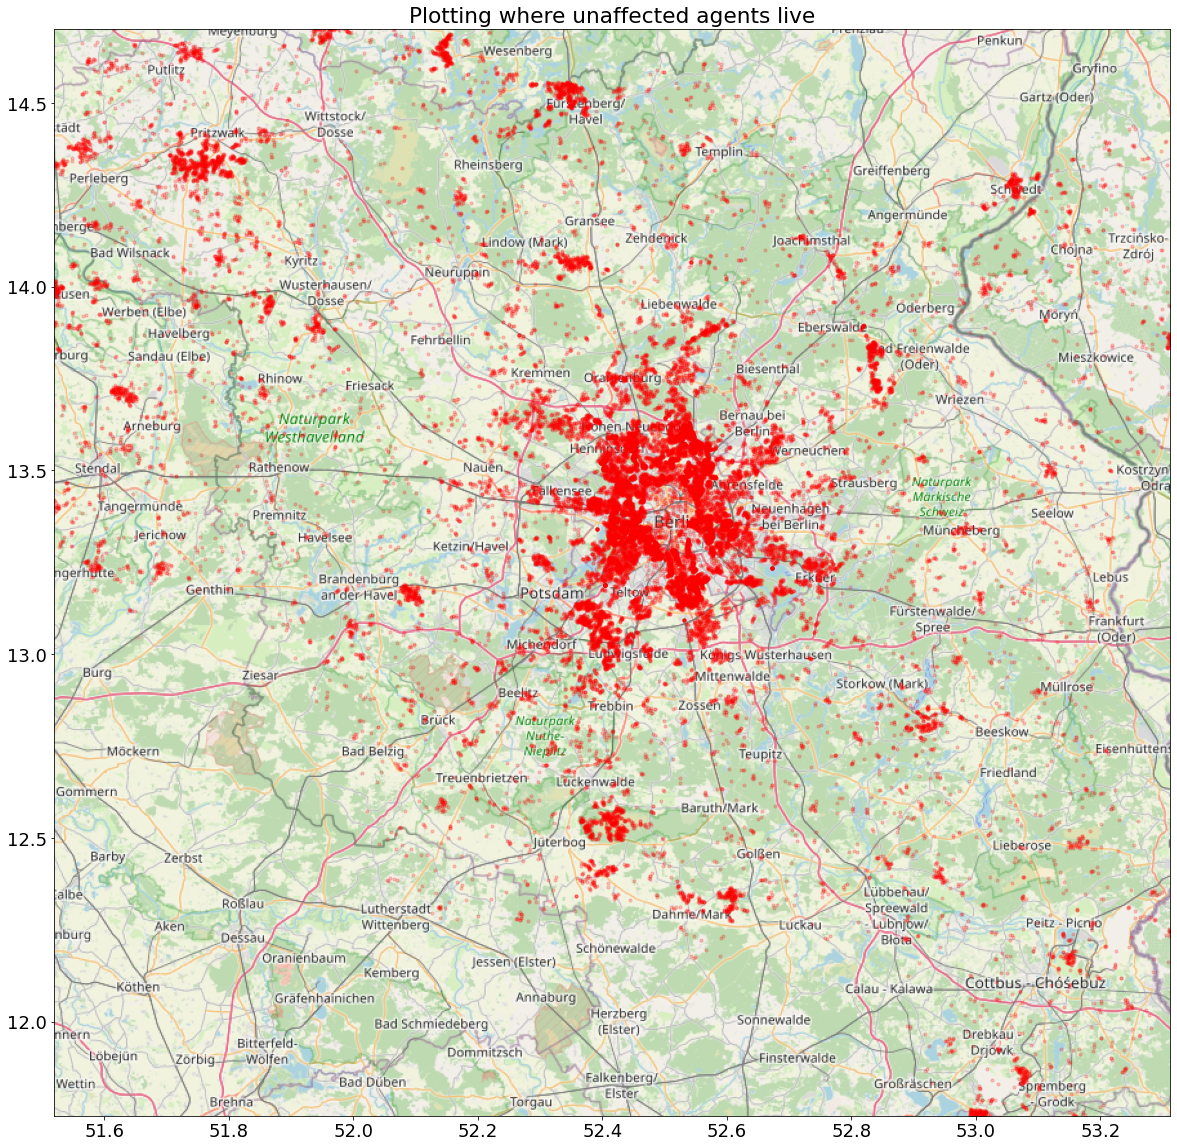

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(coordinates_per_person_unaffected.longitude, coordinates_per_person_unaffected.latitude, zorder=1, alpha=0.2,
           c='r', s=10)
ax.set_title('Plotting where unaffected agents live')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(berlin_png, zorder=0, extent=BBox, aspect='auto')


<AxesSubplot:ylabel='primary used leg mode per people by distance'>

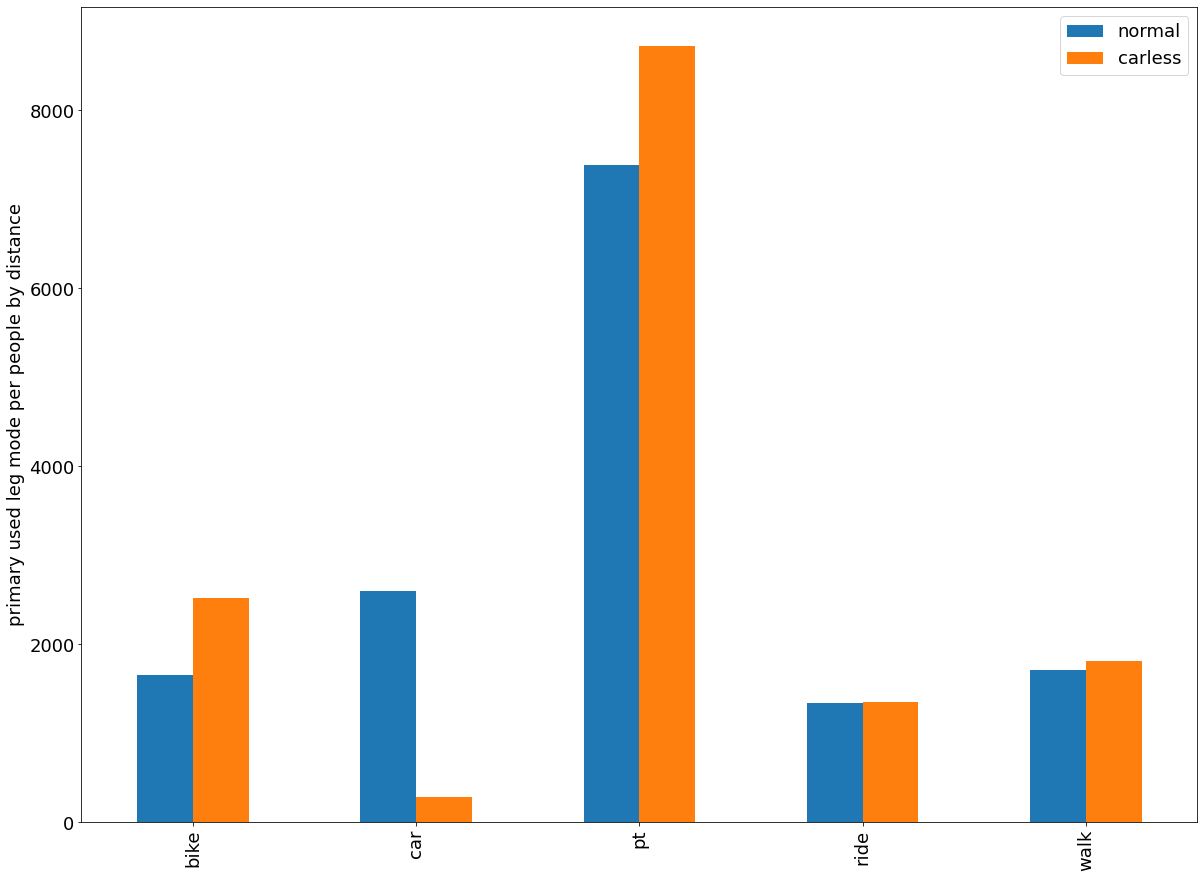

In [33]:
primary_leg_modes_for_plot = pd.DataFrame(
    {"normal": normal_data[normal_data["isAffected"]]["primaryLegModeByDistance"].value_counts(),
     "carless": carless_data[normal_data["isAffected"]]["primaryLegModeByDistance"].value_counts()})

primary_leg_modes_for_plot.plot.bar(ylabel="primary used leg mode per people by distance", figsize=(20, 15))
